In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read Dataset
df = pd.read_parquet('../data/processed_datasets/final_dataset_v3.parquet')
df.head()

,index,county,date,daily_cases,daily_deaths,POP2020,Partially Vaccinated,Fully Vaccinated,Non Vaccinated,Partially Vaccinated per Population,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Albany,2020-03-26,19.0,0.0,314848,0.0,0.0,0.0,0.0,...,80.0,43.0,3.795482,0.254091,-51.0,-11.0,43.0,-53.0,-55.0,23.0
1,110535,Suffolk,2020-03-26,475.0,2.0,1524665,0.0,0.0,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
2,110536,Suffolk,2020-03-26,475.0,2.0,1524665,0.0,0.0,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
3,110537,Suffolk,2020-03-26,475.0,2.0,1524665,0.0,0.0,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
4,110538,Suffolk,2020-03-26,475.0,2.0,1524665,0.0,0.0,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0


In [3]:
# Set Facility Name and Date as indexes 
df_sorted = df.copy()
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted = df.sort_values(by=['Facility Name','date']).set_index(['Facility Name','date'])
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted.head()

county  daily_cases  daily_deaths  \
Facility Name              date                                            
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  Otsego          1.0           0.0   
                           2020-03-27  Otsego          2.0           0.0   
                           2020-03-28  Otsego          2.0           1.0   
                           2020-03-29  Otsego          3.0           0.0   
                           2020-03-30  Otsego          7.0           0.0   

                                       POP2020  Partially Vaccinated  \
Facility Name              date                                        
A.O. FOX MEMORIAL HOSPITAL 2020-03-26    58524                   0.0   
                           2020-03-27    58524                   0.0   
                           2020-03-28    58524                   0.0   
                           2020-03-29    58524                   0.0   
                           2020-03-30    58524                   0.0   

                                       Fully Vaccinated  Non Vaccinated  \
Facility Name              date                                           
A.O. FOX MEMORIAL HOSPITAL 2020-03-26               0.0             0.0   
                           2020-03-27               0.0             0.0   
                           2020-03-28               0.0             0.0   
                           2020-03-29               0.0             0.0   
                           2020-03-30               0.0             0.0   

                                       Partially Vaccinated per Population  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                  0.0   
                           2020-03-27                                  0.0   
                           2020-03-28                                  0.0   
                           2020-03-29                                  0.0   
                           2020-03-30                                  0.0   

                                       Fully Vaccinated per Population  \
Facility Name              date                                          
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                              0.0   
                           2020-03-27                              0.0   
                           2020-03-28                              0.0   
                           2020-03-29                              0.0   
                           2020-03-30                              0.0   

                                       Non Vaccinated per Population  ...  \
Facility Name              date                                       ...   
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                            0.0  ...   
                           2020-03-27                            0.0  ...   
                           2020-03-28                            0.0  ...   
                           2020-03-29                            0.0  ...   
                           2020-03-30                            0.0  ...   

                                       Number of ICU Beds By County  \
Facility Name              date                                       
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                          14.0   
                           2020-03-27                          14.0   
                           2020-03-28                          14.0   
                           2020-03-29                          14.0   
                           2020-03-30                          14.0   

                                       Number of ICU Beds Available By County  \
Facility Name              date                                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                     3.0   
                           2020-03-27                                     4.0   
                           2020-03-28          

In [4]:
# subset date range
# train_start_date = '2020-01-01'
# train_end_date = '2021-11-30'

train_start_date = '2021-06-01'
train_end_date = '2021-11-30'

test_start_date = '2021-11-30'
test_end_date = '2022-11-01'


subset = df_sorted.copy()
subset['day_of_week'] = subset.index.get_level_values('date').dayofweek
subset['day_of_month'] = subset.index.get_level_values('date').day
subset['overload'] = subset['Number of Beds Available'] + \
    subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

# diff column with difference between yesterday and day
diff_cols = []
for i in range(1, 4):
    subset.loc[:, 'overload_T-' +
               str(i)] = subset.groupby(level=0)['overload'].shift(i)
    subset.loc[:, 'overload_T-' +
               str(i) + '_diff'] = subset.groupby(level=0)['overload_T-'+str(i)].diff()
    diff_cols.append('overload_T-' +
                     str(i))
    diff_cols.append('overload_T-'+str(i) + '_diff')

features_list = ['Patients Currently Hospitalized', 'Patients Age 55 to 64 Years'] #'Patients Age 65 to 74 Years'
for col in features_list:
    subset.loc[:, col+'_diff'] = subset.groupby(level=0)[col].diff()
    diff_cols.append(col)
    diff_cols.append(col+'_diff')

# overload 7 day in future
subset.loc[:, 'overload-14day'] = subset.groupby(level=0)['overload'].shift(14)
# dropping NAs
subset = subset.dropna()

target = 'overload-14day'
cols = ['overload-14day', 'overload', *diff_cols, 'day_of_week', 'day_of_month',
        'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']


subset_temp_test = subset[(
    subset.index.get_level_values('date') > '2021-11-30')]
subset = subset[cols]
# subset = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                 (subset.index.get_level_values('date') <= '2022-01-31')]


subset_test = subset[(subset.index.get_level_values('date') > test_start_date) & (
    subset.index.get_level_values('date') <= test_end_date)]
# subset_test = subset[(subset.index.get_level_values('date') > test_start_date)]
subset = subset[(subset.index.get_level_values('date') >= train_start_date) & (
    subset.index.get_level_values('date') <= train_end_date)]
# subset = subset[(subset.index.get_level_values('date') <= train_end_date)]

subset.shape, subset_test.shape


# subset_train = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                       (subset.index.get_level_values('date') <= '2022-01-31')]
# subset_test = subset[(subset.index.get_level_values('date') >= '2022-02-01') &
#                      (subset.index.get_level_values('date') <= '2022-02-28')]
# subset_train.shape, subset_test.shape


((34770, 16), (16910, 16))

In [5]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics

models = []
models.append(('LR', LinearRegression()))
# models.append(('NN', MLPRegressor(solver='lbfgs')))  # neural network
# models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB', XGBRegressor()))
# Ensemble method - collection of many decision trees
models.append(('RF', RandomForestRegressor(n_estimators=10)))
# models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

# X_cols = ['date', 'Facility Name', *cols[1:]]
# y_cols = target

# Evaluate each model in turn
results_r2=[]
results_mae=[]
names=[]
feature_importances={}
for name, model in models:
    # TimeSeries Cross validation
    tscv=TimeSeriesSplit(n_splits=4)
    cv_results=[]
    cv_maeScore=[]
    feature_importances[name]=[]
    print(f"---------{name}----------")
    for train_index, test_index in tscv.split(subset):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test=subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'],
                                                                                       columns='level_2').drop([target], axis=1), subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'], columns='level_2').drop([target], axis=1)
        y_train, y_test=subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=[
            'Facility Name', 'date'], columns='level_2')[target], subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=[
                'Facility Name', 'date'], columns='level_2')[target]
        # print(y_train)
        clf=model
        _=clf.fit(X_train, y_train)
        feature_importances[name].append(_)

        preds=clf.predict(X_test)
        # accuracy for the current fold only
        r2score=clf.score(X_test, y_test)
        maescore=metrics.mean_absolute_error(y_test, preds)
        cv_results.append(r2score)
        cv_maeScore.append(maescore)
        # regression_results(y_test, preds)

    # cv_results = cross_val_score(
    #     model, X_train, y_train, cv=tscv, scoring='r2')
    cv_results=np.asarray(cv_results)
    cv_maeScore=np.asarray(cv_maeScore)
    results_r2.append(cv_results)
    results_mae.append(cv_maeScore)
    names.append(name)
    print('r2 %s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print('mae %s: %f (%f)' % (name, cv_maeScore.mean(), cv_maeScore.std()))


---------LR----------
r2 LR: 0.879570 (0.026205)
mae LR: 11.716142 (1.363034)
---------XGB----------
r2 XGB: 0.845498 (0.029936)
mae XGB: 13.221688 (1.393255)
---------RF----------
r2 RF: 0.844450 (0.027064)
mae RF: 13.470303 (1.361006)


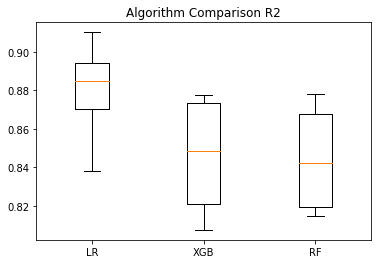

In [7]:
# Compare Algorithms R2
plt.boxplot(results_r2, labels=names)
plt.title('Algorithm Comparison R2')
plt.show()

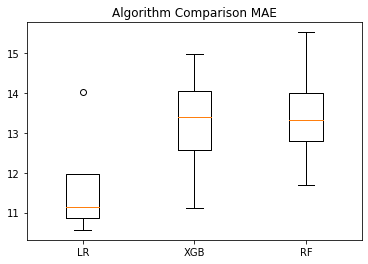

In [8]:
# Compare Algorithms MAE
plt.boxplot(results_mae, labels=names)
plt.title('Algorithm Comparison MAE')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

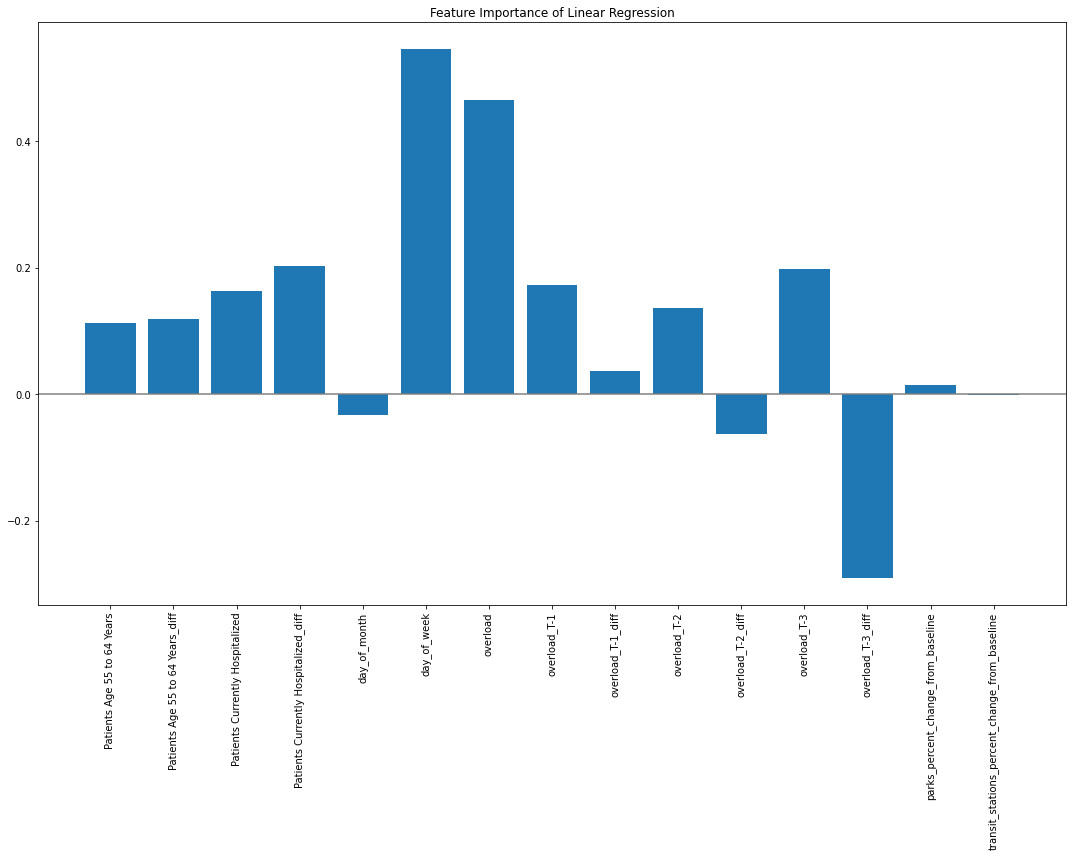

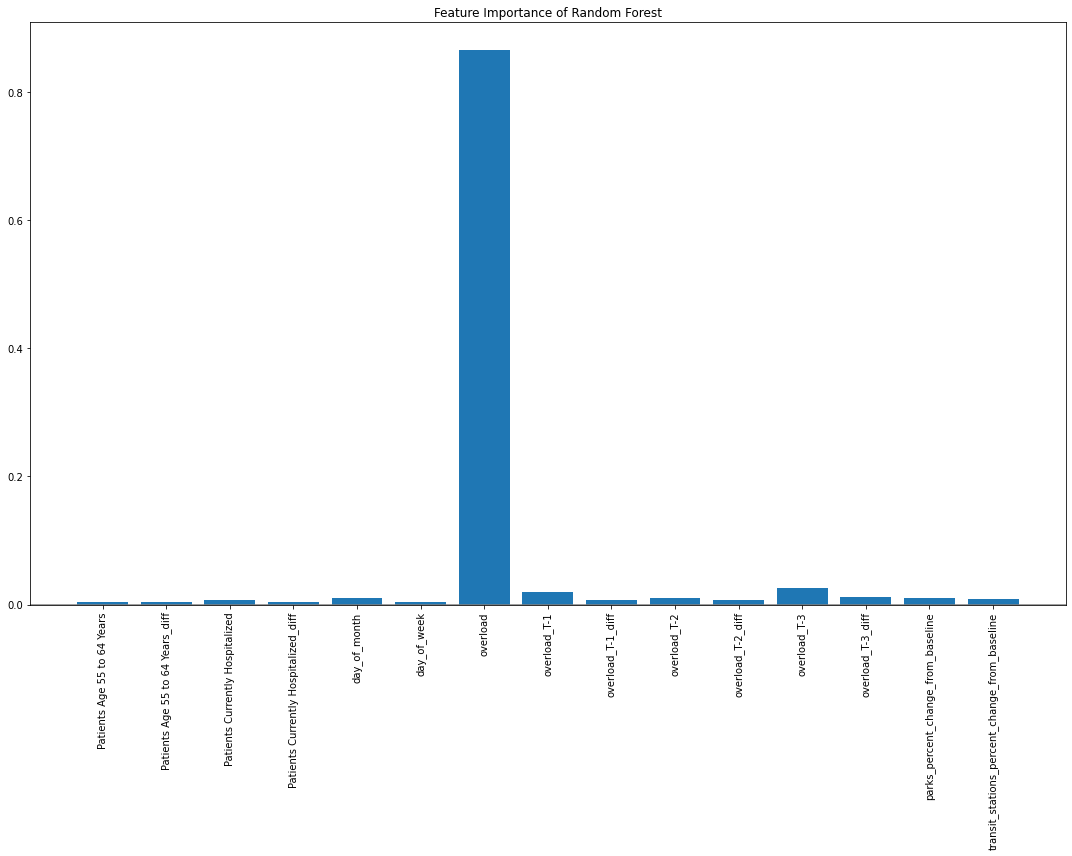

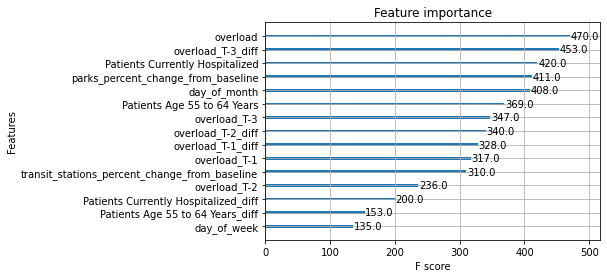

In [9]:
import importlib
import sys
sys.path.append('../notebooks/')
import helper
import xgboost
importlib.reload(helper)
# Feature Importance of LR
_model = feature_importances['LR'][1]
fig_name = 'LR_feature_importance_plot_ML_v3'
helper.plot_feature_importance(
    _model, title="Feature Importance of Linear Regression", save_fig=fig_name)

# Feature Importance of RF
_model = feature_importances['RF'][1]
fig_name = 'RF_feature_importance_plot_ML_v3'
helper.plot_feature_importance(
    _model, title="Feature Importance of Random Forest", save_fig=fig_name)

f = _model.feature_names_in_
_model = feature_importances['XGB'][1]
# _model.get_booster().feature_names = f
xgboost.plot_importance(_model.get_booster())
# helper.plot_feature_importance(_model, title="Feature Importance of XGB", x_cols=f_cols)


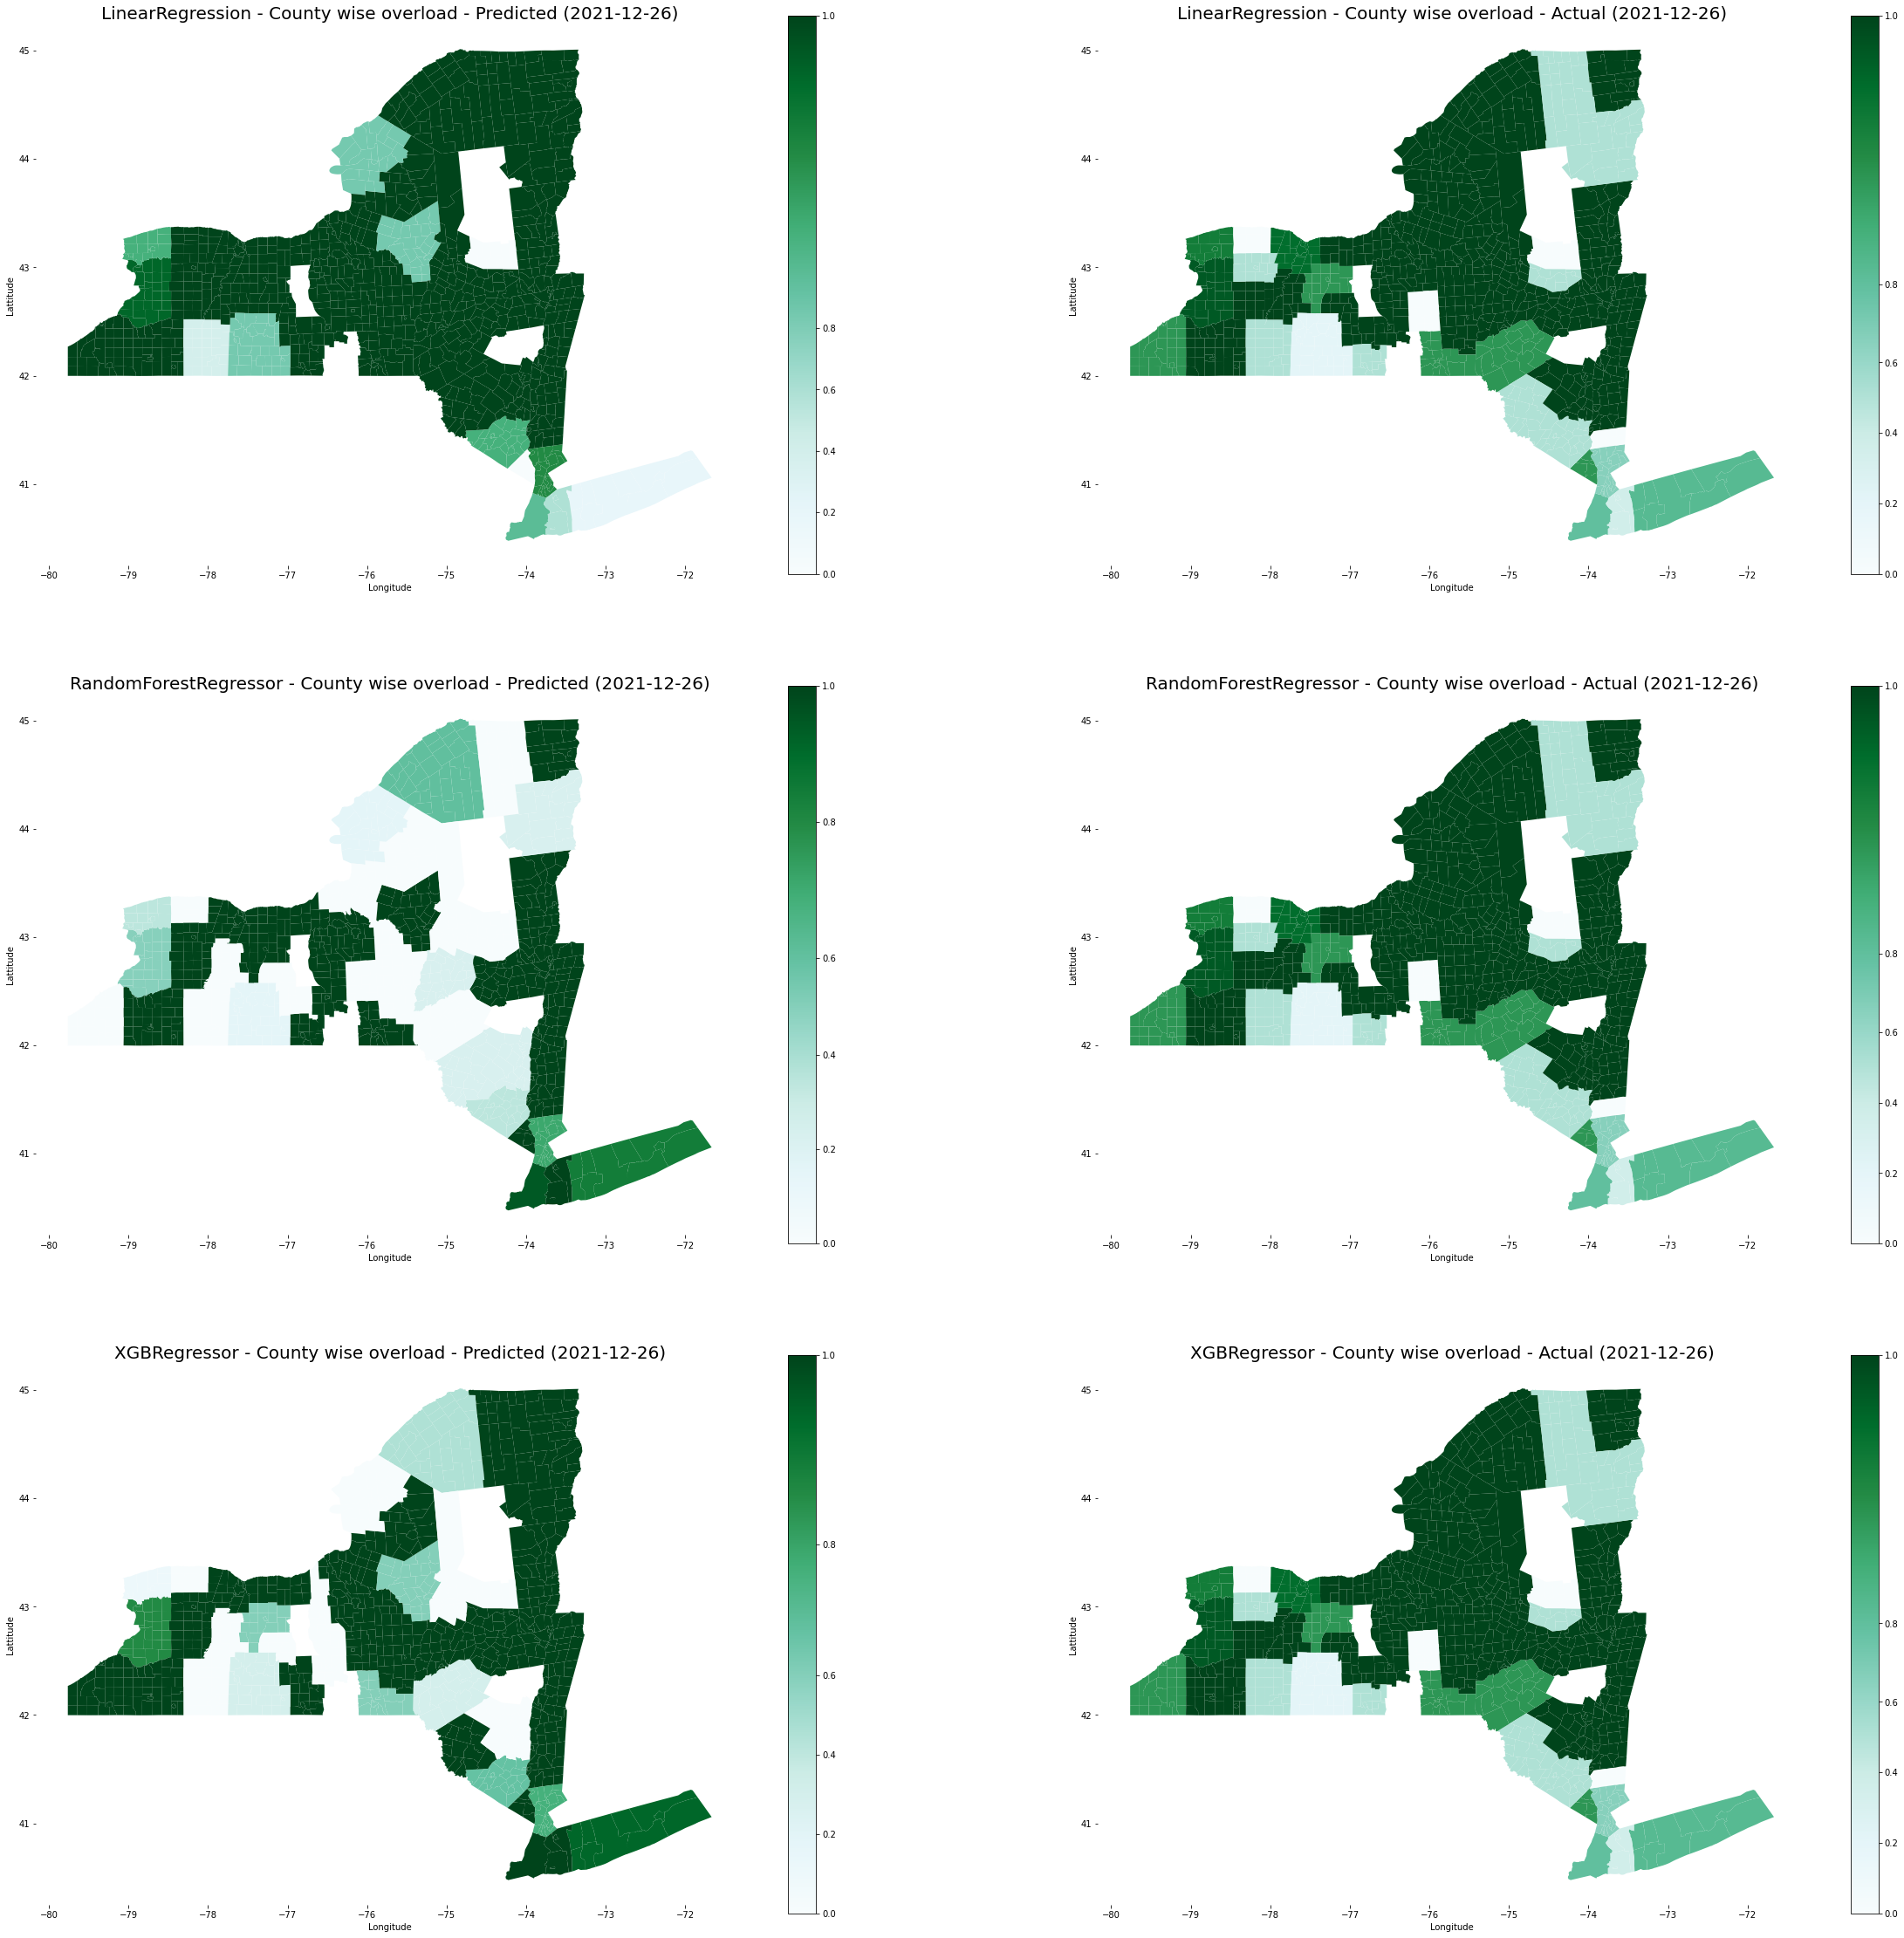

In [10]:
import warnings
import importlib
import sys
sys.path.append('../notebooks/')
import helper
importlib.reload(helper)

warnings.filterwarnings('ignore')

models = [feature_importances['LR'][1],
          feature_importances['RF'][1], feature_importances['XGB'][1]]

fig, axs = plt.subplots(
    figsize=(40, 40), nrows=3, ncols=2)

date = '2021-12-26'
tag = 'v4'
i = 0
for model in models:
    temp = helper.prepare_df_for_geo_plot(
        subset_temp_test, model, target, cols, date=date)
    helper.plot_geo_data(temp, 'predicted_overload_%', ax=axs[i][0], fig=fig, show_base_cbar=True,
                         cmap='BuGn', title=f'{model.__class__.__name__} - County wise overload - Predicted ({date})')
    helper.plot_geo_data(temp, 'actual_overload_%', ax=axs[i][1], fig=fig, show_base_cbar=True,
                         cmap='BuGn', title=f'{model.__class__.__name__} - County wise overload - Actual ({date})')
    i += 1
fig.savefig(f"../notebooks/plots/{tag}_predicted_vs_actual_{date}.jpeg")
fig.show()


In [11]:
# Number of counties in the map predicted correctly.
# Number of Counties
temp2 = temp[temp['actual_overloaded_hsp'] == temp['predicted_overloaded_hsp']]
len(temp2.groupby('COUNTY').count())

25